In [6]:
from scipy.stats import gamma, uniform
import matplotlib.pyplot as plt
import numpy as np

In [7]:
gamma_a = 5.0
gamma_b = 1.0

uniform_loc = 0
uniform_scale = 15

N = 10000

In [8]:
def p(x: np.ndarray) -> np.ndarray:
    return gamma.pdf(x, a=gamma_a, scale=gamma_b)

def q(x: np.ndarray) -> np.ndarray:
    return uniform.pdf(x, loc=uniform_loc, scale=uniform_scale)

def sampling_q() -> np.ndarray:
    return uniform.rvs(loc=uniform_loc, scale=uniform_scale, size=N)

def sampling_from_array_by_weight(xs: np.ndarray, weights: np.ndarray) -> np.ndarray:
    return np.random.choice(xs, size=N, p=weights)

In [9]:
# Sampling from q (uniforma distribution).
xs = sampling_q()

# Compute weights.
rates = np.array([p(x) / q(x) for x in xs])
rate_sum = rates.sum()
weights = rates / rate_sum

# Resampling by weights.
re_xs = sampling_from_array_by_weight(xs, weights)

<BarContainer object of 50 artists>

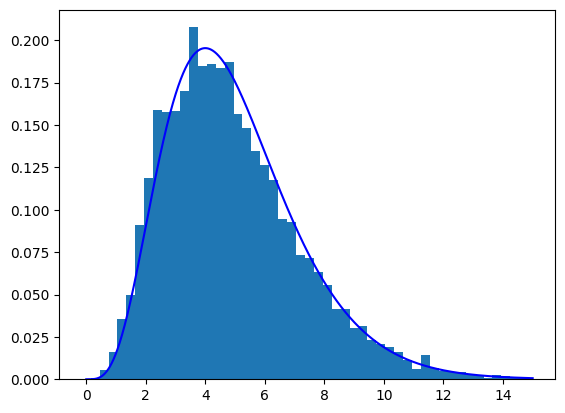

In [10]:
# Generate uniform numbers (0, 15)
z = np.linspace(uniform_loc, uniform_scale, N)

# Plot Gamma PDF.
plt.plot(z, p(z), color="blue", label="gamma")

# Plot SIR.
hist, edges = np.histogram(re_xs, bins=50, range=(uniform_loc, uniform_scale), density=True)
w = edges[1] - edges[0]
plt.bar(edges[:-1], hist, w)